['fig']


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_4376\3066249689.py:170: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(k)


"\ngraph = plt.figure()\ngraph.suptitle('Plot Time', fontsize=14)\nplt.plot(state,'bo')\nplt.xlabel(r'Time [A.U.]', fontsize=12)\nplt.ylabel(r'State [A.U.]', fontsize=12)\nplt.grid(True)\n#graph.savefig(save_path + filestring + '_' + 'magnetization.png', dpi=250, bbox_inches='tight')\nplt.show()\n"

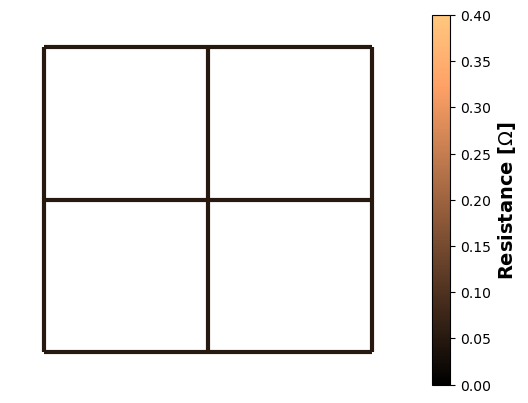

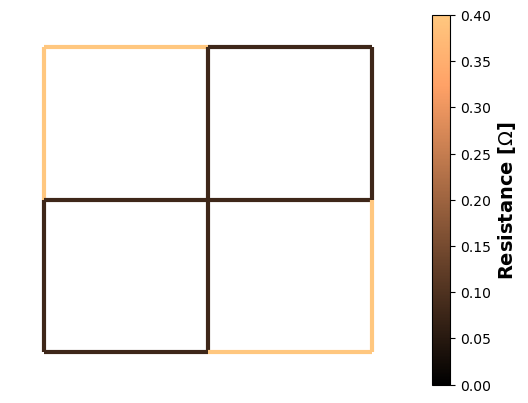

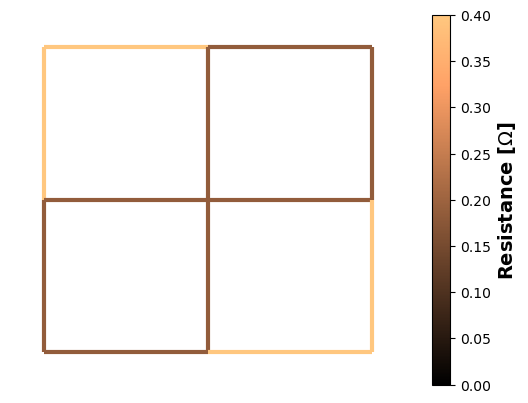

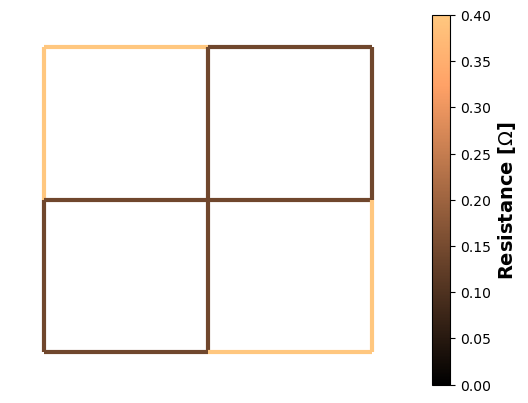

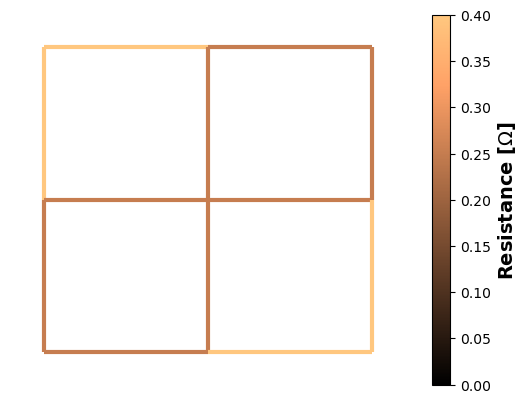

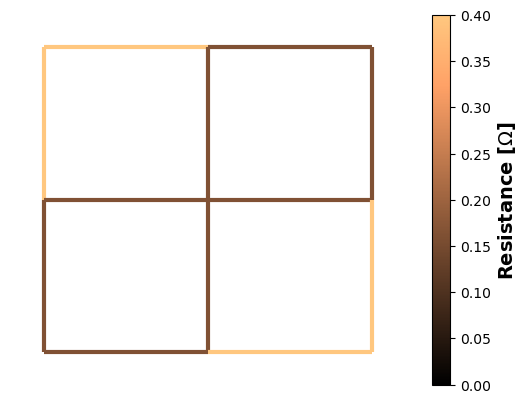

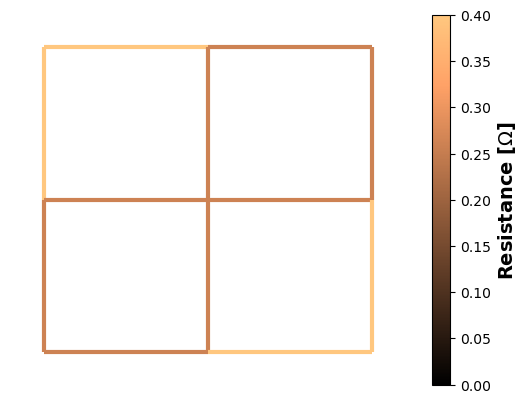

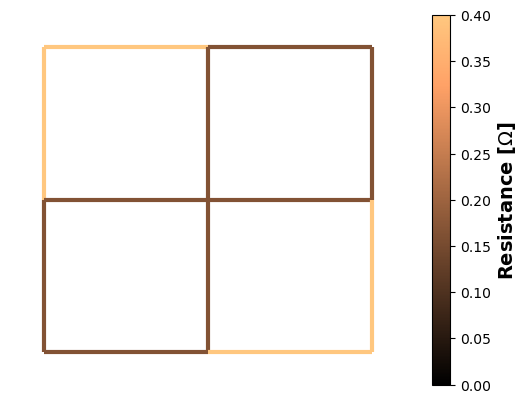

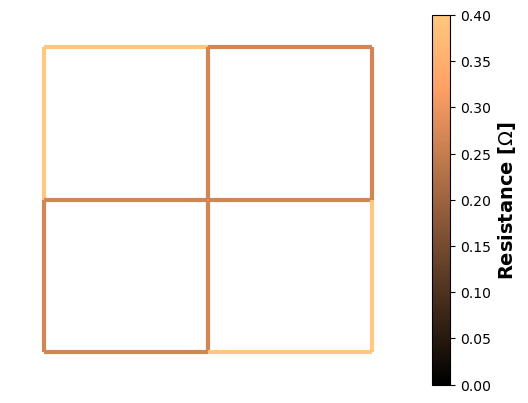

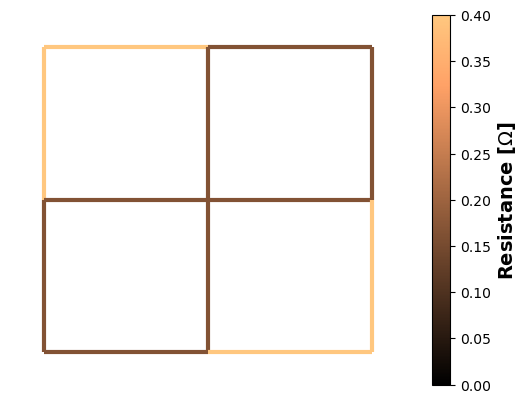

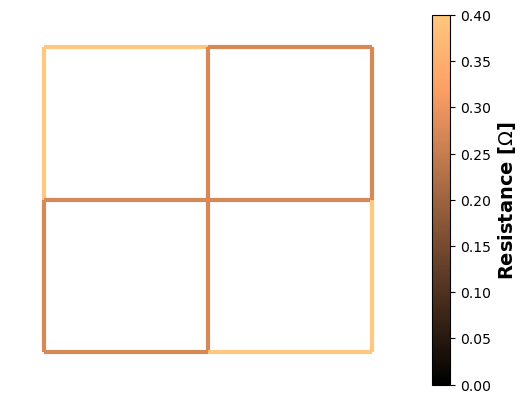

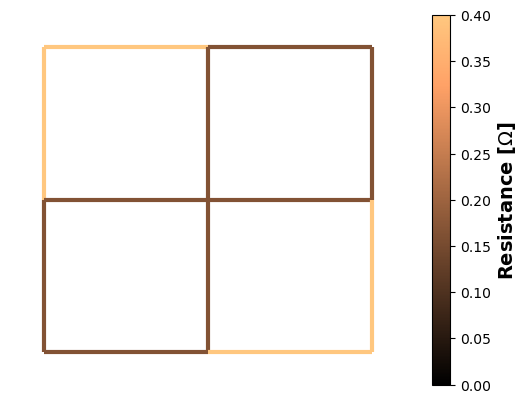

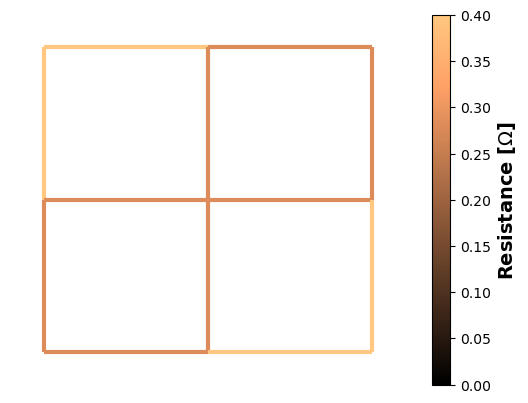

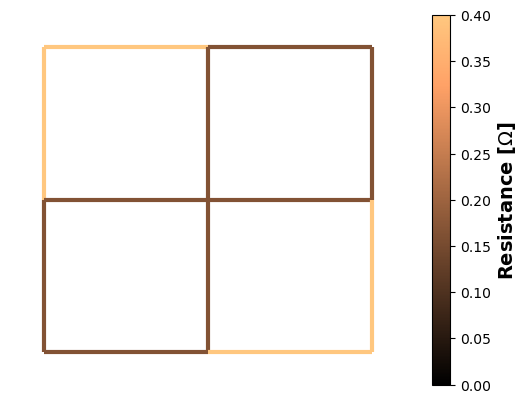

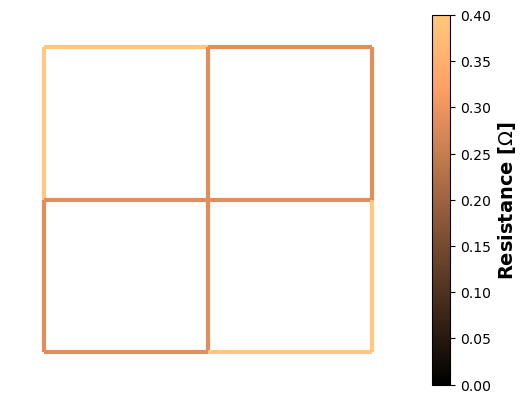

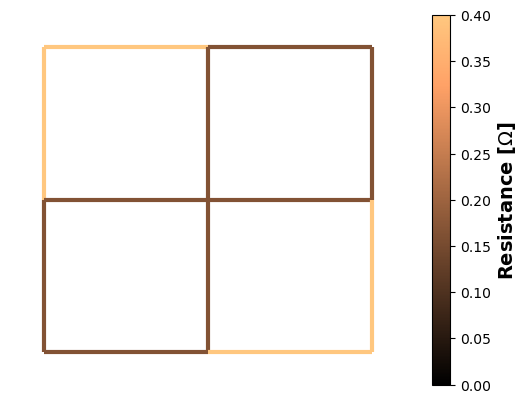

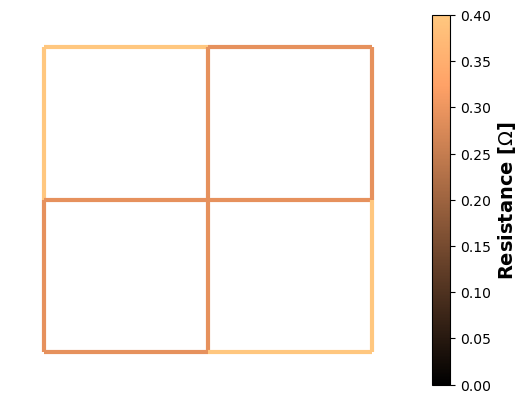

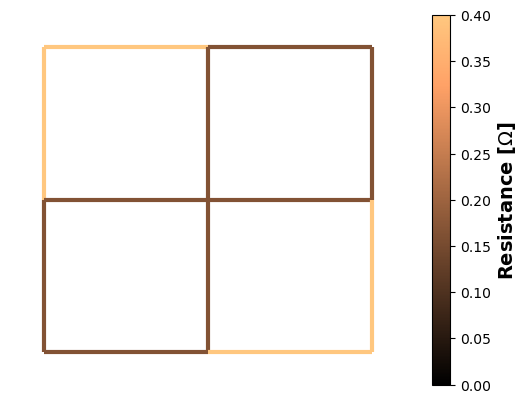

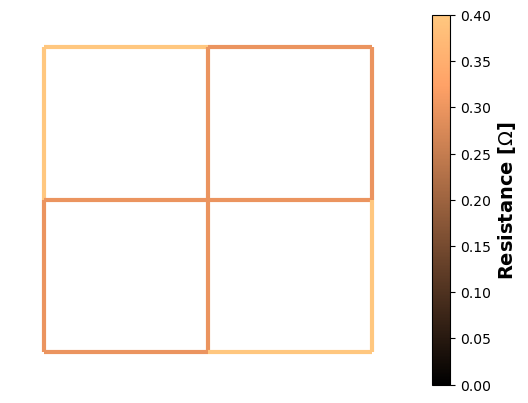

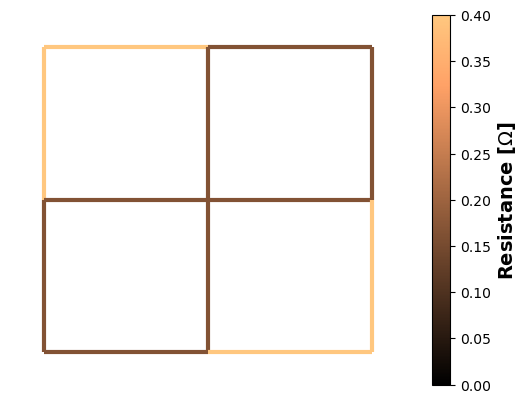

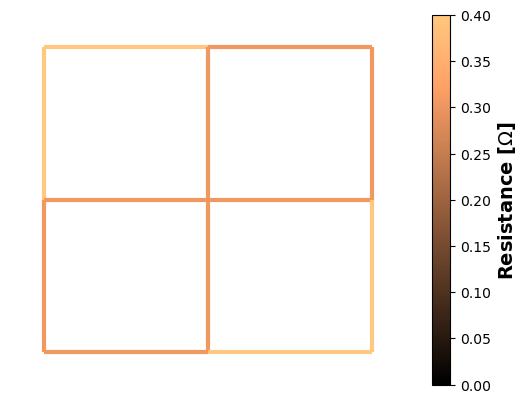

In [3]:
# -*- coding: utf-8 -*-
"""
gsanca
May 2021

"""
#TODO:
# - get grafo from simulation

import os
import numpy as np
import matplotlib.pyplot as plt
import time
import networkx as nx
import re



def date_time_now():
    # Date settings
    today       = time.localtime()
    reduceYear  = str(today.tm_year)[2:]
    completeMon = str(today.tm_mon ).zfill(2)
    completeDay = str(today.tm_mday).zfill(2)
    completeHs  = str(today.tm_hour).zfill(2)
    completeMin = str(today.tm_min ).zfill(2)
    dateString  = reduceYear + completeMon + completeDay + completeHs + completeMin 
    filestring  = str(today.tm_year) + completeMon + completeDay   
    
    return [filestring,dateString]

results_path    = './simulations_n/' 
#TODO: 	One maps.py per simulation or one maps.py that analyze all the experiments?
#		The second approach needs a logfile which records previous experiments
#		in order to avoid repetitions. Each experiment must have it own "fig" folder 
#		A for loop is needed to perform all the analysis.
#				experimentFolders = os.listdir('./')
#				for folder in experimentsFolders:
#						results_path    = folder
#						<THE WHOLE ANALYSYS IN HERE>	
save_path       = './'

folder          = os.listdir(results_path)
folder.sort()
file_quantity   = len(folder)
file_counter    = 0

sims            = []
states          = []

for files in folder:
    if not re.search('pdf',files):
        if re.search('states',files):
            states.append(files)    
        else:
            sims.append(files)    

print(sims)
            
for oneState in states:
    theFile = results_path + oneState
    f       = open(theFile, 'r') 
    lines   = f.readlines()
    aux     = lines
    timeV   = []
    state   = []
    lineNum = 0
    for line in lines:
        if lineNum >= 1:
            timeV.append(float(line.split(',')[0]))
            last = len(line.split(','))
            for i in range(1,last-1):
                state.append(float(line.split(',')[i]))
        lineNum = lineNum + 1 
a = len(timeV)

linea = []
for oneState in states:
    theFile = results_path + oneState
    f       = open(theFile, 'r') 
    lines   = f.readlines()
    aux     = lines
    timeV   = []
    state   = []
    i       = 0
    for line in lines:
        if i == 0:
            line1 = line
        else:
            linea.append(line)
        i = i+1
        
#print(line1)

f       = 0
line1   = line1.split(',')
Nc       = 20 #int(states[f].strip('.csv').split('_')[1].split('x')[0])
Mf       = 20 #int(states[f].strip('.csv').split('_')[1].split('x')[1])

k       = 0
#for items in linea:
#    if (k == 0):
for items in linea:
    if (k % 500 == 0) or (k == len(linea)-1):#500
#    if (k == 0) or (k == len(linea)/2) or (k == len(linea)-1):  # uncomment this to generate maps each 100 points
        line2 = items.split(',')
    
        G     = nx.grid_2d_graph(Nc,Mf)
        nodes = []
        
        for values in line1:
            if values != 'time':
                aux = values.strip('"L()"')
                x   = aux.split(')(')[0]
                y   = aux.split(')(')[1]
                a0  = int(x.split(';')[0])
                a1  = int(x.split(';')[1])
                b0  = int(y.split(';')[0])
                b1  = int(y.split(';')[1].strip(')\n'))
                a   = (a0,a1)
                b   = (b0,b1)
                nodes.append(a)
                nodes.append(b)
                           
        nodes = list(set(nodes))
        nodes.sort()
        
        totalNodes = []
        for i in range(0,Nc):
            for j in range(0,Mf):
                totalNodes.append((i,j))
            
        removedNodes = set(totalNodes)-set(nodes)
        pos          = dict((((Nc-1)-y,x),(x,y)) for x,y in G.nodes())
        labels       = dict(((x, y), (x,y)) for x, y in G.nodes())
        
        for node in removedNodes:
            G.remove_node(node)
        
        h = 0
        color_map = []
        position  = []
        for value in line1:
            if value != 'time':
                Aux = value.strip('"L()"') 
                X   = Aux.split(')(')[0]
                Y   = Aux.split(')(')[1]
                x0  = int(X.split(';')[0])
                y0  = int(X.split(';')[1])
                x1  = int(Y.split(';')[0])
                y1  = int(Y.split(';')[1].strip(')\n'))
                color = float(line2[h])#/1000.0                                  # Pasarlo a kOmh
                position.append(((x0,y0),(x1,y1),color))
            h = h+1
        
        A = []
        for ns in G.edges:
            A.append(ns)
        
        for items in A:
            for elements in position:
                if set(items) == set((elements[0],elements[1])):
                    color_map.append(elements[2])
        
        labels_edge = []
        for i in range(0,len(A)):
            labels_edge.append('+')
        
    
        fig = plt.figure(k)        
#         ns  = nx.draw_networkx(G, 
#                          pos        = pos,
#                          nodelist   = nodes,
#                          font_size  = 10,
#                          node_color = 'k',  
#                          node_size  = 5,
#                          linewidths = 5.0,
#                          node_shape = 'o',)
        
        es  = nx.draw_networkx_edges(G, 
                         pos        = pos,
                         edgelist   = None,
                         width      = 3.0,
                         edge_vmin  = 0,
                         edge_vmax  = 0.4,
                         edge_cmap  = plt.cm.copper,
                         #labels     = labels_edge, 
                         edge_color = color_map,)

#        ls  = nx.draw_networkx_edge_labels(G, 
#                         pos        = pos,
#                         width      = 3.0,
#                         edge_labels= pos,)
      
#        import matplotlib.ticker as ticker
#        def fmt(x, pos):
#            a, b = '{:.2e}'.format(x).split('e')
#            b    = int(b)
#            return r'${} \times 10^{{{}}}$'.format(a, b)

        cbar = plt.colorbar(es)#, format=ticker.FuncFormatter(fmt))
        cbar.ax.set_ylabel('Resistance [$\Omega$]', fontsize = 14, weight="bold")
        plt.axis('off')
        save_path = './simulations_n/' + '/fig/' #results_path
        name_fig  = str(k).zfill(2) + '.png'
        path      = save_path + name_fig
        fig.savefig(path, bbox_inches='tight', dpi=150)
#        plt.show()
    k = k+1


"""
graph = plt.figure()
graph.suptitle('Plot Time', fontsize=14)
plt.plot(state,'bo')
plt.xlabel(r'Time [A.U.]', fontsize=12)
plt.ylabel(r'State [A.U.]', fontsize=12)
plt.grid(True)
#graph.savefig(save_path + filestring + '_' + 'magnetization.png', dpi=250, bbox_inches='tight')
plt.show()
"""
